# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# Check if jupyter notebook is using gpu
import torch
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.device_count()
torch.cuda.get_device_name(0)
torch.cuda.is_available()

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import torch
import time

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
def ddpg(n_episodes=100):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): print scores every n-th episode
    """
    """
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    """
    scores = []
    scores_window = deque(maxlen=100)
    training_starting_time = time.time()
    
    # loop through all episodes
    for i_episode in range(1, n_episodes+1):
        # get time current time
        episode_starting_time = time.time()
        
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment        
        states = env_info.vector_observations                  # get the current state (for each agent)        
        agent.reset()         
        score = np.zeros(num_agents)                           # initialize the score (for each agent)
        
        # loop through all time steps in episode
        while True:
            # define actions
            actions = agent.act(states)
            
            # get next states, rewards and done from environment
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            # agents take step
            agent.step(states, actions, rewards, next_states, dones)
            
            score += rewards                                   # update the score (for each agent)
            states = next_states                               # roll over states to next time step

            if np.any(dones):                                  # exit loop if episode finished 
                break
        
        scores.append(np.mean(score))
        scores_window.append(np.mean(score))
        
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        elapsed_training_time = time.time() - training_starting_time
        elapsed_training_time_str = time.strftime('%Mm%Ss', time.gmtime(elapsed_training_time))
        
        elapsed_episode_time = time.time() - episode_starting_time
        elapsed_episode_time_str = time.strftime('%Mm%Ss', time.gmtime(elapsed_episode_time))
        
        print('\rTime elapsed since training started: {}'.format(elapsed_training_time_str))
        print('\rEpisode {} took: {}'.format(i_episode, elapsed_episode_time_str))        
        print('\rEpisode: {} - Score: {} - tAverage Score: {}'.format(i_episode, np.mean(score), np.mean(scores_window)))  
        
        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {} episodes - Average Score: {}'.format(i_episode, np.mean(scores_window)))
            break
            
    return scores

In [6]:
agent = Agent(state_size=33, action_size=4, random_seed=0, num_agents=num_agents)
scores = ddpg()

Time elapsed since training started: 00m13s
Episode 1 took: 00m13s
Episode: 1 - Score: 0.7439999833703042 - tAverage Score: 0.7439999833703042
Time elapsed since training started: 00m27s
Episode 2 took: 00m13s
Episode: 2 - Score: 0.5739999871701003 - tAverage Score: 0.6589999852702022
Time elapsed since training started: 00m41s
Episode 3 took: 00m13s
Episode: 3 - Score: 0.6844999847002328 - tAverage Score: 0.6674999850802124
Time elapsed since training started: 00m54s
Episode 4 took: 00m13s
Episode: 4 - Score: 0.4379999902099371 - tAverage Score: 0.6101249863626436
Time elapsed since training started: 01m08s
Episode 5 took: 00m13s
Episode: 5 - Score: 0.45949998972937467 - tAverage Score: 0.5799999870359898
Time elapsed since training started: 01m22s
Episode 6 took: 00m13s
Episode: 6 - Score: 0.47149998946115373 - tAverage Score: 0.5619166541068504
Time elapsed since training started: 01m36s
Episode 7 took: 00m13s
Episode: 7 - Score: 0.6639999851584435 - tAverage Score: 0.57649998711422

Time elapsed since training started: 16m27s
Episode 59 took: 00m19s
Episode: 59 - Score: 29.532499339897186 - tAverage Score: 11.69191499290262
Time elapsed since training started: 16m47s
Episode 60 took: 00m19s
Episode: 60 - Score: 32.013999284431335 - tAverage Score: 12.030616397761431
Time elapsed since training started: 17m06s
Episode 61 took: 00m19s
Episode: 61 - Score: 31.04899930600077 - tAverage Score: 12.34239316674896
Time elapsed since training started: 17m25s
Episode 62 took: 00m19s
Episode: 62 - Score: 33.62649924838915 - tAverage Score: 12.685685200323801
Time elapsed since training started: 17m45s
Episode 63 took: 00m19s
Episode: 63 - Score: 34.7319992236793 - tAverage Score: 13.035626692758015
Time elapsed since training started: 18m04s
Episode 64 took: 00m19s
Episode: 64 - Score: 34.252499234396964 - tAverage Score: 13.367140326221124
Time elapsed since training started: 18m23s
Episode 65 took: 00m19s
Episode: 65 - Score: 34.81099922191352 - tAverage Score: 13.69704584

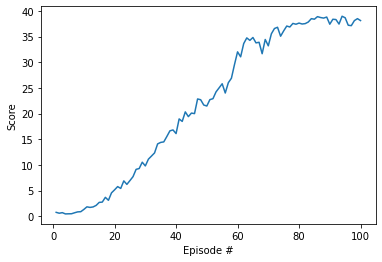

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [8]:
env.close()